# **Step 1. 데이터 전처리**

단위: Million

단위 확인(비교) : Call of Duty 4: Modern Warfare, Rock Band

링크>> https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_360_video_games

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col=0)

raw.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


##**1-1 Sales 데이터 정리**

*   Sales 단위 통일(M, 백만)
*   int to float 변환
*   Total열 생성 : 모든 국가 판매량

In [4]:
#Sales Numeric
def clean_s(x):
    if 'K' in x:
        return float(x.replace('K','')) * 0.001
    if 'M' in x:
        return float(x.replace('M',''))
    else : return float(x)

raw['NA_Sales']=raw['NA_Sales'].apply(clean_s)
raw['EU_Sales']=raw['EU_Sales'].apply(clean_s)
raw['JP_Sales']=raw['JP_Sales'].apply(clean_s)
raw['Other_Sales']=raw['Other_Sales'].apply(clean_s)

# raw['Mean']= (raw['NA_Sales']+raw['EU_Sales']+raw['JP_Sales']+raw['Other_Sales'])/4
raw['Total']= raw['NA_Sales']+raw['EU_Sales']+raw['JP_Sales']+raw['Other_Sales']
raw.tail(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17




*   출고 수치 단위 변환 (백만 ->만)


In [5]:
def to_Int(x):
    return int(round(x,10) * 100)

raw['NA_Sales']=raw['NA_Sales'].apply(to_Int)
raw['EU_Sales']=raw['EU_Sales'].apply(to_Int)
raw['JP_Sales']=raw['JP_Sales'].apply(to_Int)
raw['Other_Sales']=raw['Other_Sales'].apply(to_Int)
raw['Total']=raw['Total'].apply(to_Int)
raw.tail(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,15,4,0,1,20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,1,0,0,0,1
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,44,19,3,13,79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,5,5,25,3,38
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,16,1,17


## **1-2 Year 데이터 정리**

*   Total 0.5 이상인 게임 중, Year값이 없는 데이터에 수기 입력


In [6]:
#Year 정리
raw['Year']=raw['Year'].replace(np.nan, 0)

#numeric
raw['Year']=raw['Year'].round(0).astype(int)
raw.loc[raw.Year <  1980, 'Year'] = 0  #1980이하의 값 없애기

raw.loc[(raw['Name']=='Ratchet & Clank: Going Commando'),'Year']=2003
raw.loc[(raw['Name']=='Uncharted 4: A Thief\'s End'),'Year']=2016
raw.loc[(raw['Name']=='Adventure Island'),'Year']=1986
raw.loc[(raw['Name']=='Kingdom Hearts: Birth by Sleep'),'Year']=2010
raw.loc[(raw['Name']=='Madden NFL 2004'),'Year']=2003
raw.loc[(raw['Name']=='Pokemon Black/Pokemon White'),'Year']=2010
raw.loc[(raw['Name']=='FIFA Soccer 2004'),'Year']=2003
raw.loc[(raw['Name']=='The Elder Scrolls V: Skyrim'),'Year']=2011
raw.loc[(raw['Name']=='Rock Band'),'Year']=2007
raw.loc[(raw['Name']=='Mini-Yonku Shining Scorpion: Let\'s & Go!!'),'Year']=1996
raw.loc[(raw['Name']=='LEGO Star Wars II: The Original Trilogy'),'Year']=2006
raw.loc[(raw['Name']=='Call of Duty 3'),'Year']=2006
raw.loc[(raw['Name']=='LEGO Batman: The Videogame'),'Year']=2008
raw.loc[(raw['Name']=='wwe Smackdown vs. Raw 2006'),'Year']=2005
raw.loc[(raw['Name']=='NBA 2K15'),'Year']=2014
raw.loc[(raw['Name']=='Dragon Quest Heroes: Rocket Slime'),'Year']=2005
raw.loc[(raw['Name']=='Virtua Cop'),'Year']=1994
raw.loc[(raw['Name']=='Mobile Suit Gundam'),'Year']=2011
raw.loc[(raw['Name']=='Yakuza 4'),'Year']=2010
raw.loc[(raw['Name']=='Hitman 2: Silent Assassin'),'Year']=2002
raw.loc[(raw['Name']=='Mobile Suit Gundam: Extreme VS Full Boost'),'Year']=2012
raw.loc[(raw['Name']=='LEGO Indiana Jones: The Original Adventures'),'Year']=2008
raw.loc[(raw['Name']=='NCAA Football 2002'),'Year']=2001
raw.loc[(raw['Name']=='LEGO Harry Potter: Years 5-7'),'Year']=2011
raw.loc[(raw['Name']=='Triple Play 99'),'Year']=1998
raw.loc[(raw['Name']=='WarioWare: Twisted!'),'Year']=2004
raw.loc[(raw['Name']=='Call of Duty: Black Ops'),'Year']=2010
raw.loc[(raw['Name']=='Frogger\'s Adventures: Temple of the Frog'),'Year']=2001
raw.loc[(raw['Name']=='NASCAR Thunder 2003'),'Year']=2002
raw.loc[(raw['Name']=='Monster Hunter 2'),'Year']=2006
raw.loc[(raw['Name']=='Rhythm Heaven'),'Year']=2008
raw.loc[(raw['Name']=='Suikoden III'),'Year']=2002
raw.loc[(raw['Name']=='Combat'),'Year']=1977
raw.loc[(raw['Name']=='PES 2009: Pro Evolution Soccer'),'Year']=2008
raw.loc[(raw['Name']=='Space Invaders'),'Year']=1978
raw.loc[(raw['Name']=='Super Robot Taisen F Kanketsuhen'),'Year']=1998
raw.loc[(raw['Name']=='Adventure'),'Year']=1980

## **1-3 Platform 데이터 정리**

*   각 브랜드별 제품 라인별로 분류
*   제품타입 구분 추가 (Portable / Family com / PC)



In [7]:
#Platform 정리 by product line
raw['Platform']=raw['Platform'].replace('N64','NES').replace('PS2', 'PS').replace('PS3', 'PS').replace('PS4', 'PS').replace('X360', 'XB').replace('XOne', 'XB').replace('3DS','DS').replace('GB','DS').replace('GBA','DS').replace('PSV','PSP').replace('SNES','NES').replace('GEN', 'DC').replace('SAT', 'DC')
raw['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS', 'PC', 'XB', 'GC', '2600', 'DC', 'NES',
       'WiiU', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'],
      dtype=object)

In [8]:
#플랫폼 구분 추가
def form(lst) :
    if 'DS' in lst: return 'Portable'
    elif 'Wii' in lst: return 'Family'
    elif 'PSP' in lst: return 'Portable'
    elif 'PS' in lst: return 'Family'
    elif 'XB' in lst: return 'Family'
    elif 'GC' in lst: return 'Family'
    elif '2600' in lst: return 'Family'
    elif 'NES' in lst: return 'Family'
    elif 'WiiU' in lst: return 'Portable'
    elif 'SCD' in lst: return 'Family'
    elif 'WS' in lst: return 'Portable'
    elif 'NG' in lst: return 'Family'
    elif 'TG16' in lst: return 'Family'
    elif '3DO' in lst: return 'Family'
    elif 'GG' in lst: return 'Portable'
    elif 'PCFX' in lst: return 'Family'
    elif 'PC' in lst: return 'PC'
    elif 'DC' in lst: return 'Family'
raw['Form']=raw['Platform'].apply(form)

## **1-4 Genre 정리**

- Total 0.5이상 게임에 장르 수기 입력

- 장르 구분 기준 : 한국 콘텐츠진흥원


In [9]:
#Genre 정리
raw.loc[(raw['Name']=='Pokemon X/Pokemon Y'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='MVP Baseball 2004'),'Genre']='Sports'
raw.loc[(raw['Name']=='Wii Party'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='Ape Escape: On the Loose'),'Genre']='Platform'
raw.loc[(raw['Name']=='NFL Street'),'Genre']='Sports'
raw.loc[(raw['Name']=='Grand Theft Auto IV'),'Genre']='Simulation'
raw.loc[(raw['Name']=='Dragon Ball Z: Ultimate Tenkaichi'),'Genre']='Fighting'
raw.loc[(raw['Name']=='Chrono Cross'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='Final Fantasy XII'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='Yakuza 3'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='F-Zero X'),'Genre']='Racing'
raw.loc[(raw['Name']=='Onimusha: Warlords'),'Genre']='Action'
raw.loc[(raw['Name']=='Skylanders Giants'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='James Bond 007: Nightfire'),'Genre']='Shooter'
raw.loc[(raw['Name']=='WarioWare, Inc.: Mega Party Game$'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='Bloodborne'),'Genre']='Role-Playing'
raw.loc[(raw['Name']=='Need for Speed Underground 2'),'Genre']='Racing'
#raw[(raw['Genre'].isna())&(raw['Total']>0.5)]
#raw[(raw['Genre']=='Shooter')&(raw['Total']>3)]

raw['Genre']=raw['Genre'].replace('Action','Act/Adv').replace('Adventure','Act/Adv').replace('Racing','Sports').replace('Simulation','Strategy').replace('Fighting', 'Figh/Shot').replace('Shooter', 'Figh/Shot')
raw['Genre'].unique()

array(['Act/Adv', 'Misc', 'Platform', 'Sports', 'Strategy',
       'Role-Playing', 'Puzzle', 'Figh/Shot', nan], dtype=object)

# **Step 2. Quenstions**

*   1970년대 이후 출시된 게임 데이터
*   total 0이 아닌 데이터


In [10]:
df=pd.DataFrame(raw[(raw['Total'] !=0) & (raw['Year']>1970)])
df=df.reset_index(drop=True)
df=df[['Name', 'Form', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Total']]
df

,Name,Form,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,Portable,DS,2008,Act/Adv,Destineer,4,0,0,0,4
1,The Munchables,Family,Wii,2009,Act/Adv,Namco Bandai Games,17,0,0,1,18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Portable,PSP,2010,Act/Adv,Alchemist,0,0,2,0,2
3,Deal or No Deal: Special Edition,Portable,DS,2010,Misc,Zoo Games,4,0,0,0,4
4,Ben 10 Ultimate Alien: Cosmic Destruction,Family,PS,2010,Platform,D3Publisher,12,9,0,4,25
...,...,...,...,...,...,...,...,...,...,...,...
16269,Ice Age 2: The Meltdown,Family,GC,2006,Platform,Vivendi Games,15,4,0,1,20
16270,Rainbow Islands: Revolution,Portable,PSP,2005,Act/Adv,Rising Star Games,1,0,0,0,1
16271,NBA 2K16,Family,PS,2015,Sports,Take-Two Interactive,44,19,3,13,79
16272,Toukiden: The Age of Demons,Portable,PSP,2013,Act/Adv,Tecmo Koei,5,5,25,3,38


*   중복값 처리 : 최근 출시 버전 데이터로 축약

In [11]:
df=df.sort_values(['Year'] ,ascending=True).drop_duplicates(subset=['Name','Platform'],keep='last').reset_index(drop=True)
# df[df.duplicated(['Name','Platform'])]
df=df.dropna()
# df.isnull().sum()

# **Q1. 지역에 따라 선호하는 게임 장르가 다를까 ?**

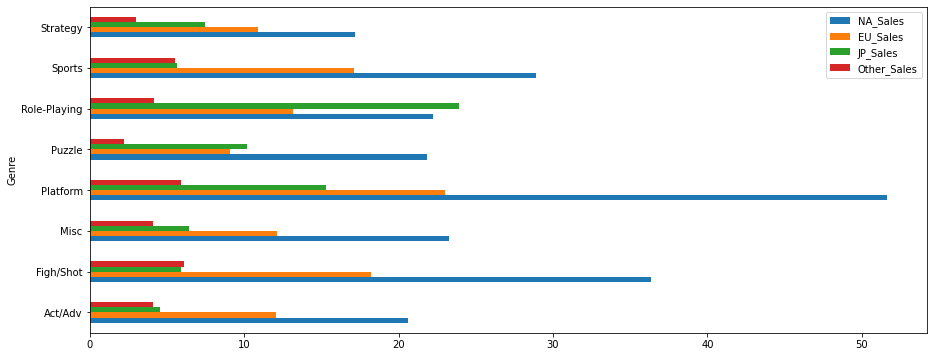

In [16]:
df_G=df.groupby('Genre').mean()
df_G=df_G.drop(['Year', 'Total'], axis=1)
df_G

plt.rcParams['figure.figsize'] = [15, 6]
df_G.plot.barh()

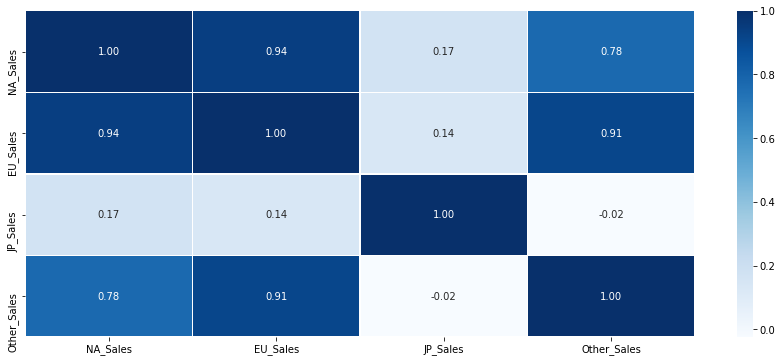

In [19]:
df_G.corr()

import seaborn as sns
sns.heatmap(data = df_G.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

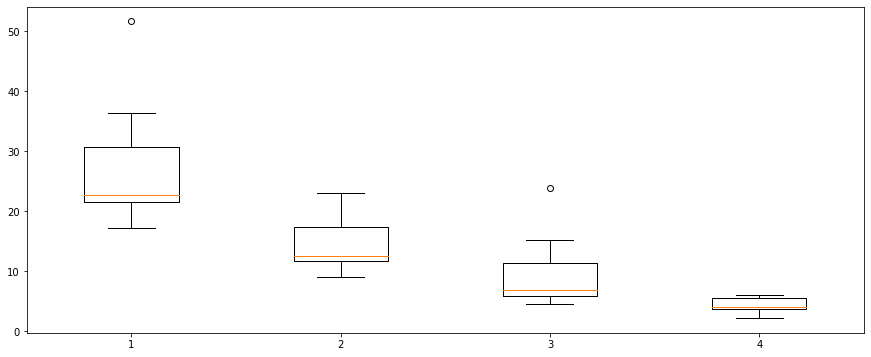

ANOVA 결과 : F=16.3, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


KruskalResult(statistic=23.275568181818187, pvalue=3.537913547137816e-05)

In [14]:
na=df_G['NA_Sales']
eu=df_G['EU_Sales']
jp=df_G['JP_Sales']
ot=df_G['Other_Sales']

plot_data = [na, eu, jp, ot]
ax = plt.boxplot(plot_data)
plt.show()


from scipy import stats
from scipy.stats import f_oneway
F_statistic, pVal = stats.f_oneway(na, eu, jp, ot)
print('ANOVA 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

stats.kruskal(na, eu, jp, ot) #정규성 가정 미충족 - 귀무가설 기각

## 시도 ...

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(Genre),7.937580e+05,7.0,42.778702,1.121977e-60
C(Nation),4.249761e+06,3.0,534.417546,0.000000e+00
C(Genre):C(Nation),9.862706e+05,21.0,17.717983,8.930239e-66
Residual,1.647364e+08,62148.0,NaN,NaN


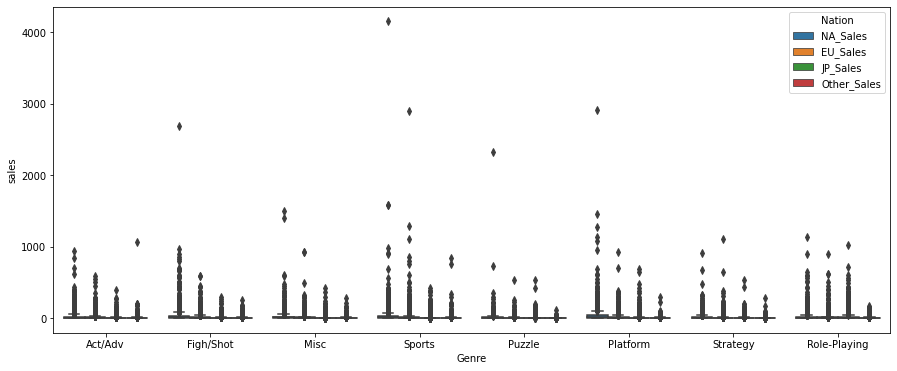

In [20]:
#ANOVA test
import seaborn as sns
g_melt=pd.melt(df, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
g_melt.columns=['Genre', 'Nation', 'sales']
sns.boxplot(x="Genre", y="sales", hue="Nation", data=g_melt) 

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('sales ~ C(Genre) + C(Nation) + C(Genre):C(Nation)', data=g_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
#장르-지역에 대한  two-sample chi-square test
#표본 집단간 평균 비교
from scipy.stats import chi2_contingency
print(chi2_contingency(df_G, correction = False)) 
print(chi2_contingency(df_G, correction = True))
#p=0.07

(30.832971036184688, 0.07648302523377391, 21, array([[21.09442027, 11.09097455,  7.39640315,  3.43217719],
       [34.31904964, 18.044189  , 12.03339668,  5.58389649],
       [22.89775116, 12.03912561,  8.02871075,  3.72558896],
       [46.64298654, 24.52383948, 16.35457756,  7.58906822],
       [21.07267933, 11.07954365,  7.38878005,  3.42863982],
       [31.32330705, 16.46909452, 10.98299   ,  5.09647284],
       [28.51774496, 14.9939927 ,  9.99926691,  4.63999259],
       [18.90811733,  9.94146535,  6.62981285,  3.07645378]]))
(30.832971036184688, 0.07648302523377391, 21, array([[21.09442027, 11.09097455,  7.39640315,  3.43217719],
       [34.31904964, 18.044189  , 12.03339668,  5.58389649],
       [22.89775116, 12.03912561,  8.02871075,  3.72558896],
       [46.64298654, 24.52383948, 16.35457756,  7.58906822],
       [21.07267933, 11.07954365,  7.38878005,  3.42863982],
       [31.32330705, 16.46909452, 10.98299   ,  5.09647284],
       [28.51774496, 14.9939927 ,  9.99926691,  4.63

In [ ]:
#남미 판매량 - 전체 판매량 상관관계
from scipy import stats
NA_cut = pd.cut(df["NA_Sales"], 5).astype("category")
All_cut = pd.cut(df["Total"], 5).astype("category")
data = pd.crosstab(NA_cut, All_cut)

chi, pvalue, _, _ = stats.chi2_contingency(data, correction=False)
chi, pvalue

#p-value = 0.0 ->유의미한 차이가 있다. 관련있다.

(30662.37256189323, 0.0)

#**Q2. 연도별 게임 트랜드가 존재하는가?**

In [44]:
def set_Y (x):
  if x >= 1980 and x < 1990:
    x = 1980
    return x
  elif x >= 1990 and x <2000:
    x = 1990
    return x
  elif x >= 2000 and x <2010:
    x = 2000
    return x
  elif x >= 2010 and x < 2020:
    x = 2010
    return x
  else:
    x = 2020
    return x

In [68]:
data_Y=df.copy()
data_Y['Year']=data_Y['Year'].apply(set_Y)
data_Y

,Name,Form,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Combat,Family,2600,2020,Act/Adv,Atari,117,7,0,1,125
1,Space Invaders,Portable,DS,2020,Figh/Shot,Activision,8,3,0,0,11
2,Space Invaders,Family,2600,2020,Figh/Shot,Atari,236,14,0,3,252
3,Space Invaders,Family,NES,2020,Figh/Shot,Activision,13,3,0,0,16
4,Bridge,Family,2600,1980,Misc,Activision,25,2,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...
15610,Pro Evolution Soccer 2017,Family,PS,2010,Sports,Konami Digital Entertainment,0,1,4,0,5
15611,Phantasy Star Online 2 Episode 4: Deluxe Package,Family,PS,2010,Role-Playing,Sega,0,0,3,0,3
15612,Phantasy Star Online 2 Episode 4: Deluxe Package,Portable,PSP,2010,Role-Playing,Sega,0,0,1,0,1
15613,Brothers Conflict: Precious Baby,Portable,PSP,2010,Act/Adv,Idea Factory,0,0,1,0,1


### **연도-플랫폼 카이제곱 검정**

pvalue : 0.0

연도와 플랫폼은 관련이 있다.

In [65]:
data_YP=pd.DataFrame(data_Y.groupby(['Year', 'Platform']).Total.sum())
data_YP=data_YP.unstack()
data_YP=data_YP.fillna(0)
data_YP.columns = data_YP.columns.droplevel(0)
data_YP

Platform,2600,3DO,DC,DS,GC,GG,NES,NG,PC,PCFX,PS,PSP,SCD,TG16,WS,Wii,WiiU,XB
Year,,,,,,,,,,,,,,,,,,
1980,8724.0,0.0,0.0,6642.0,0.0,0.0,22147.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,10.0,6915.0,15901.0,0.0,4.0,40448.0,144.0,4996.0,3.0,56386.0,0.0,186.0,16.0,46.0,0.0,0.0,0.0
2000,0.0,0.0,739.0,100079.0,19619.0,0.0,3721.0,0.0,8344.0,0.0,158258.0,22604.0,0.0,0.0,96.0,68679.0,0.0,64020.0
2010,0.0,0.0,41.0,36463.0,0.0,0.0,0.0,0.0,12115.0,0.0,69431.0,12065.0,0.0,0.0,0.0,23286.0,8177.0,57681.0
2020,377.0,0.0,0.0,39.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from scipy.stats import chi2_contingency

chi2_contingency(data_YP)

(651446.0687111892,
 0.0,
 68,
 array([[4.12191230e+02, 4.52907626e-01, 3.48512418e+02, 7.20684731e+03,
         8.88559471e+02, 1.81163050e-01, 3.00422686e+03, 6.52186981e+00,
         1.15319340e+03, 1.35872288e-01, 1.28659734e+04, 1.57018545e+03,
         8.42408184e+00, 7.24652201e-01, 6.43128829e+00, 4.16516498e+03,
         3.70342566e+02, 5.51193110e+03],
        [1.37384260e+03, 1.50955126e+00, 1.16159969e+03, 2.40205834e+04,
         2.96158861e+03, 6.03820503e-01, 1.00131554e+04, 2.17375381e+01,
         3.84361941e+03, 4.52865377e-01, 4.28825773e+04, 5.23346325e+03,
         2.80776534e+01, 2.41528201e+00, 2.14356278e+01, 1.38825881e+04,
         1.23436006e+03, 1.83713898e+04],
        [4.90146128e+03, 5.38562936e+00, 4.14424179e+03, 8.56982886e+04,
         1.05660662e+04, 2.15425174e+00, 3.57239567e+04, 7.75530627e+01,
         1.37128895e+04, 1.61568881e+00, 1.52992266e+05, 1.86714384e+04,
         1.00172706e+02, 8.61700697e+00, 7.64759369e+01, 4.95289404e+04,
         

### **연도-장르 카이제곱 검정**

pvalue : 0.0

연도와 장르는 관련이 있다.

In [66]:
data_YG=pd.DataFrame(data_Y.groupby(['Year', 'Genre']).Total.sum())
data_YG=data_YG.unstack()
data_YG=data_YG.fillna(0)
data_YG.columns = data_YG.columns.droplevel(0)
data_YG

Genre,Act/Adv,Figh/Shot,Misc,Platform,Puzzle,Role-Playing,Sports,Strategy
Year,,,,,,,,
1980,5713.0,6700.0,843.0,12101.0,6275.0,1449.0,4388.0,51.0
1990,17251.0,18796.0,6078.0,20632.0,3890.0,18209.0,29414.0,10785.0
2000,92670.0,65213.0,46473.0,36725.0,11797.0,40282.0,116790.0,36209.0
2010,60774.0,44920.0,20803.0,11618.0,2078.0,30909.0,37819.0,10338.0
2020,125.0,279.0,0.0,0.0,0.0,0.0,0.0,28.0


In [67]:
from scipy.stats import chi2_contingency

chi2_contingency(data_YG)

(95624.61103679021,
 0.0,
 28,
 array([[7.99531419e+03, 6.15537696e+03, 3.36043871e+03, 3.67199387e+03,
         1.08878993e+03, 4.11462049e+03, 8.53327787e+03, 2.60018797e+03],
        [2.66485612e+04, 2.05160092e+04, 1.12004175e+04, 1.22388378e+04,
         3.62896122e+03, 1.37141222e+04, 2.84416062e+04, 8.66648472e+03],
        [9.50741307e+04, 7.31950115e+04, 3.99597541e+04, 4.36645286e+04,
         1.29470530e+04, 4.89279041e+04, 1.01471181e+05, 3.09194367e+04],
        [4.67229370e+04, 3.59707302e+04, 1.96376981e+04, 2.14583610e+04,
         6.36265970e+03, 2.40449780e+04, 4.98666837e+04, 1.51949524e+04],
        [9.20569225e+01, 7.08721441e+01, 3.86916184e+01, 4.22788207e+01,
         1.25361741e+01, 4.73751613e+01, 9.82509606e+01, 2.99381984e+01]]))

### **10년단위 플랫폼/장르별 출시 비율 .value_counts() __시각화**

---





In [ ]:
df2=df[['Year','Platform','Genre','Total']]

#10년단위 데이터
df80=df2[(df2['Year']>1979)&(df2['Year']<1990)]
df90=df2[(df2['Year']>1989)&(df2['Year']<2000)]
df00=df2[(df2['Year']>1999)&(df2['Year']<2010)]
df10=df2[(df2['Year']>2009)&(df2['Year']<2020)]

P_80=pd.DataFrame(df80['Platform'].value_counts())
P_80=P_80.sort_values(by='Platform', ascending=0)

G_80=pd.DataFrame(df80['Genre'].value_counts())
G_80=G_80.sort_values(by='Genre', ascending=0)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


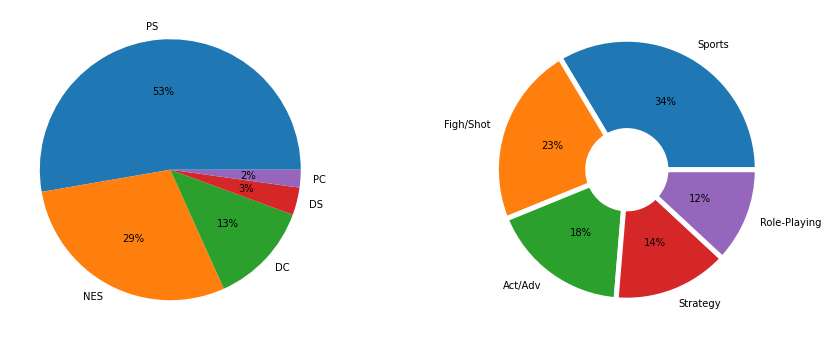

In [ ]:
#90s - platform/genre
P_90=pd.DataFrame(df90['Platform'].value_counts())
P_90=P_90.sort_values(by='Platform', ascending=0)

G_90=pd.DataFrame(df90['Genre'].value_counts())
G_90=G_90.sort_values(by='Genre', ascending=0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(P_90.head(5), labels=P_90.head(5).index, autopct='%.f%%')
ax2.pie(G_90.head(5), labels=G_90.head(5).index, autopct='%.f%%', wedgeprops=wedgeprops)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


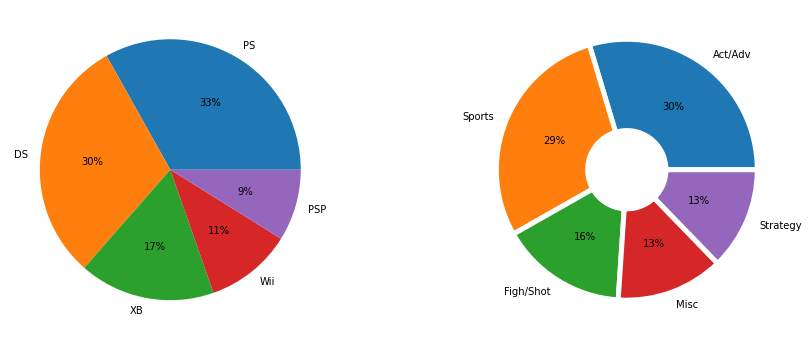

In [ ]:
#00s - platform/genre
P_00=pd.DataFrame(df00['Platform'].value_counts())
P_00=P_00.sort_values(by='Platform', ascending=0)

G_00=pd.DataFrame(df00['Genre'].value_counts())
G_00=G_00.sort_values(by='Genre', ascending=0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(P_00.head(5), labels=P_00.head(5).index, autopct='%.f%%')
ax2.pie(G_00.head(5), labels=G_00.head(5).index, autopct='%.f%%', wedgeprops=wedgeprops)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


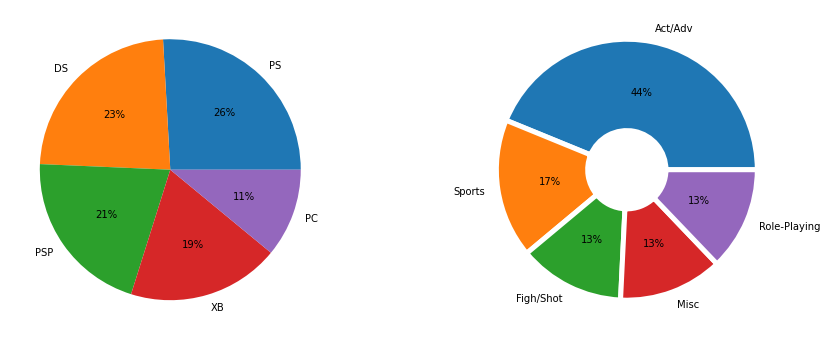

In [ ]:
P_10=pd.DataFrame(df10['Platform'].value_counts())
P_10=P_10.sort_values(by='Platform', ascending=0)

G_10=pd.DataFrame(df10['Genre'].value_counts())
G_10=G_10.sort_values(by='Genre', ascending=0)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(P_10.head(5), labels=P_10.head(5).index, autopct='%.f%%')
ax2.pie(G_10.head(5), labels=G_10.head(5).index, autopct='%.f%%', wedgeprops=wedgeprops)

plt.show()

# **Q3. 출고량 높은 게임 분석**

2000년 이후 출시 게임, 상위 100개 데이터

In [103]:
df3=df[df['Year']>1999].sort_values(by='Total', ascending=0).reset_index(drop=True)
df3=df3[df3.index<101]
df3.describe()
# df3=df3[df3['Total']>1000].reset_index(drop=True)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2008.118812,548.831683,392.435644,141.029703,131.059406,1213.554455
std,3.707525,481.796037,344.876483,170.593168,150.492048,949.866880
min,2000.000000,7.000000,1.000000,0.000000,0.000000,611.000000
25%,2005.000000,296.000000,219.000000,10.000000,64.000000,696.000000
50%,2009.000000,434.000000,299.000000,48.000000,99.000000,910.000000
75%,2011.000000,642.000000,444.000000,249.000000,137.000000,1347.000000
max,2015.000000,4149.000000,2902.000000,650.000000,1057.000000,8274.000000


### **인기 제품 플랫폼 변화**

2000년대 들어 포터블 게임콘솔이 크게 감소

> 인기 플랫폼 : DS PS Wii XB


<Figure size 720x360 with 0 Axes>

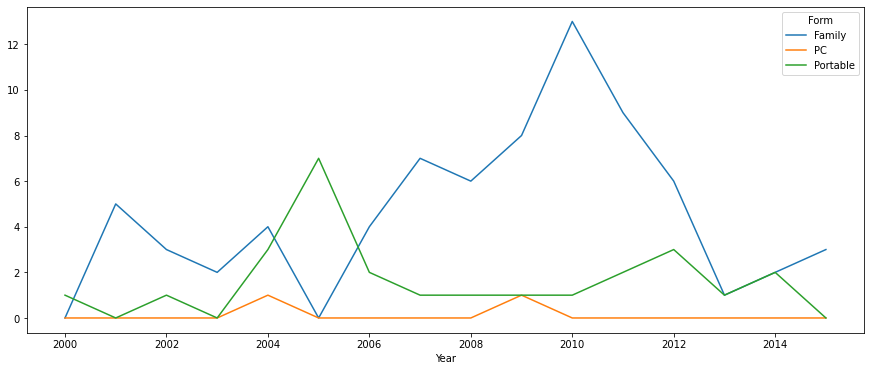

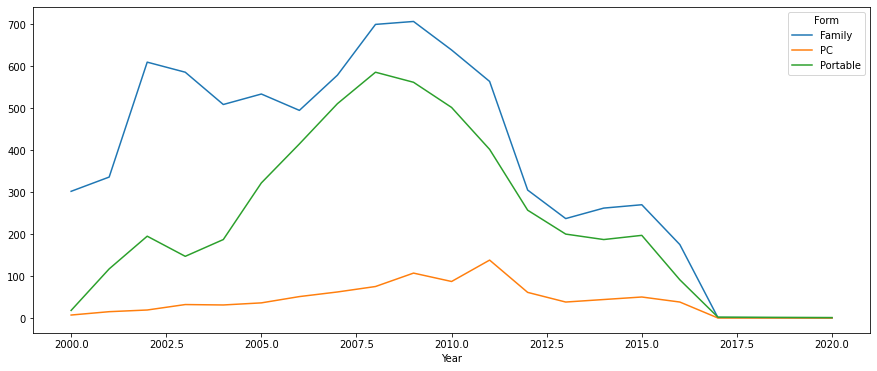

In [74]:
df.copy()
df=df[df['Year']>1999]
df_YF=pd.crosstab(index=df3.Year, columns=df3.Form)
df__YF=pd.crosstab(index=df.Year, columns=df.Form)

plt.figure(figsize=(10,5))
df_YF.plot()
df__YF.plot()

<BarContainer object of 8 artists>

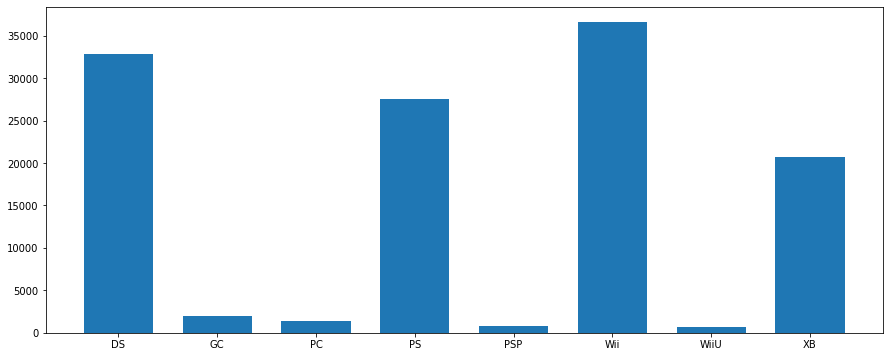

In [75]:
from matplotlib.pyplot import figure
df3_platform=df3.groupby('Platform').sum()

# figure(figsize=(15, 6), dpi=80)
plt.bar(df3_platform.index, df3_platform['Total'], width=0.7)
# plt.xticks(fontsize=12, rotation =70)

### **인기 제품 장르 변화**

앞서 연도별 장르 판매추이를 비교한 것과 마찬가지로
인기 장르는 큰 변화가 없는 편


> 인기 장르 : Sports, Figh/Shot, Role-playing, Act/Adv


<BarContainer object of 8 artists>

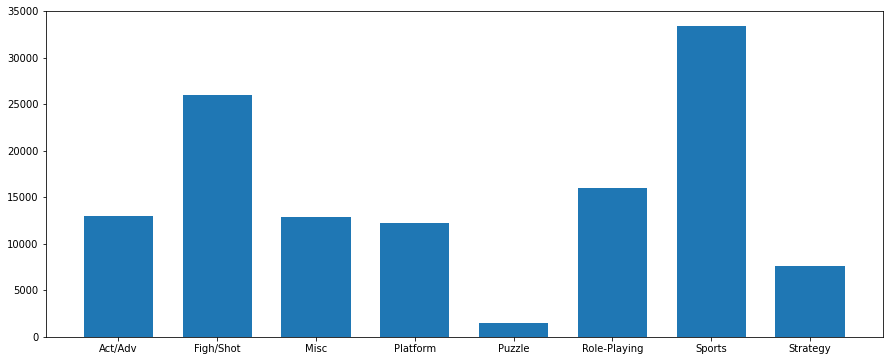

In [73]:
from matplotlib.pyplot import figure
df3_Genre=df3.groupby('Genre').sum()

# figure(figsize=(15, 6), dpi=80)
plt.bar(df3_Genre.index, df3_Genre['Total'], width=0.7)
# plt.xticks(fontsize=12, rotation =70)

## 시도 ...


- 플랫폼-장르 관련성


In [ ]:
df_G=df.groupby('Genre').mean()
df_G=df_G.drop(['Year', 'Total'], axis=1)
df_G

# plt.rcParams['figure.figsize'] = [15, 6]
# df_G.plot.barh()


# from scipy import stats
G = df3['Genre']
P = df3['Platform']
data2 = pd.crosstab(P, G)

chi, pvalue, _, _ = stats.chi2_contingency(data2, correction=False)
print(pvalue)
#p-value : 1.5e-06 관계 있다.
#플랫폼과 장르에 유의미한 차이가 있다.

1.5080247736022448e-06


- 인기 퍼블리셔

[]

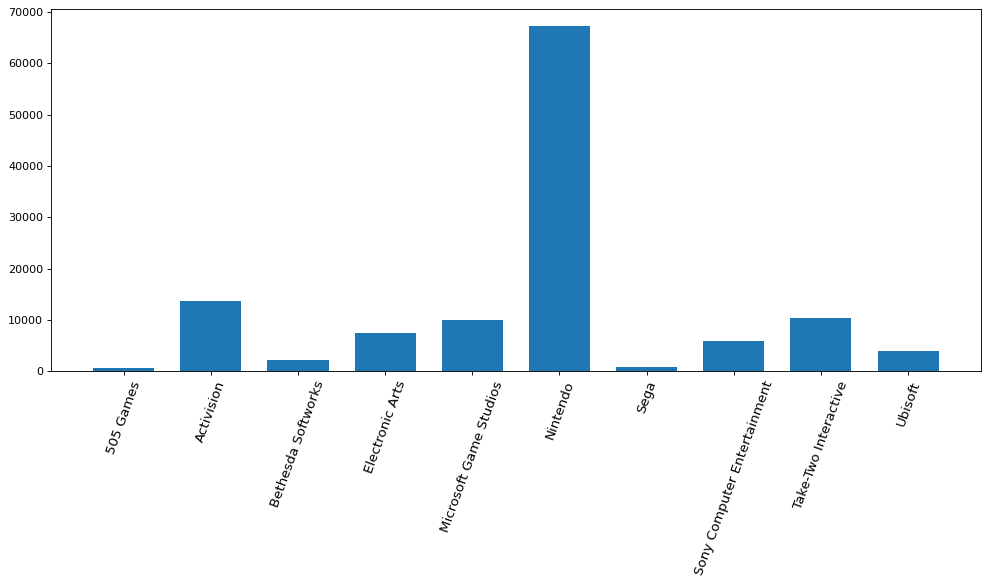

In [ ]:
from matplotlib.pyplot import figure
df3_pu=df3.groupby('Publisher').sum()

figure(figsize=(15, 6), dpi=80)
plt.bar(df3_pu.index,df3_pu['Total'], width=0.7)
plt.xticks(fontsize=12, rotation =70)

plt.plot()

# **개인과제**

### **휴대용 게임 콘솔기반 게임의 인기 장르 (2000년 이후)**

휴대용 콘솔기반 게임 중 롤플레이 장르가 눈에 띄는 판매량을 보인다.

휴대용 콘솔을 메인으로 가는 것은 위험하지만, 롤플레이 장르가 호환 가능하도록 제작할 경우 판매량 확보에 힘을 얻을 것이다.

<BarContainer object of 8 artists>

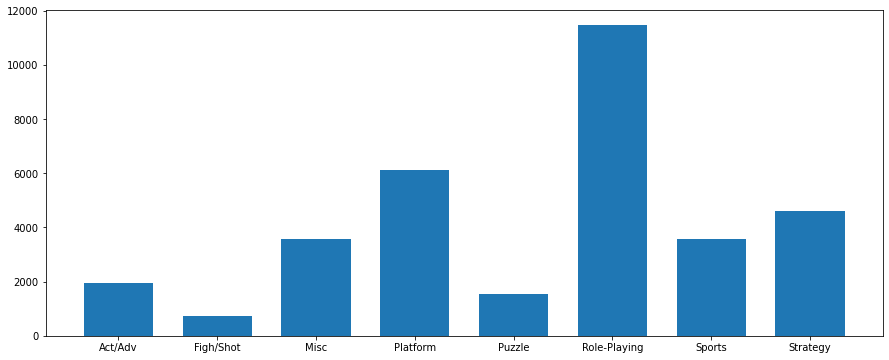

In [87]:
df_F=df3[(df3['Form']=='Portable')]

from matplotlib.pyplot import figure
df_FG=df_F.groupby('Genre').sum()

# figure(figsize=(15, 6), dpi=80)
plt.bar(df_FG.index, df_FG['Total'], width=0.7)
# plt.xticks(fontsize=12, rotation =70)

### **지역별 인기 장르-플랫폼 확인**

미국 : Figh/Shot -- XB, Sports -- Wii,  Role-Playing -- DS

유럽 : Sports --Wii, Figh/Shot --  XB, Act/Adv -- PS

일본 : Role-Playing -- DS, Sports --  Wii,  Platform --  DS

In [118]:
data_NA=df3[(df3['NA_Sales']>0)]
data_NA=data_NA.groupby(['Genre', 'Platform']).NA_Sales.sum()

In [117]:
data_NA = data_NA.sort_values(ascending = False)
data_NA

Genre         Platform
Figh/Shot     XB          10013
Sports        Wii          9720
Role-Playing  DS           4263
Act/Adv       PS           4116
Misc          Wii          3737
Figh/Shot     PS           3331
Platform      Wii          2766
              DS           2500
Sports        PS           2069
Misc          XB           1497
Sports        DS           1455
Strategy      DS           1361
Misc          DS           1088
Role-Playing  PS            792
Strategy      XB            676
Figh/Shot     Wii           675
Role-Playing  XB            503
Strategy      PS            476
Figh/Shot     GC            441
Act/Adv       DS            440
Sports        GC            412
Platform      GC            401
Sports        XB            392
Act/Adv       Wii           383
              XB            370
Puzzle        DS            344
Figh/Shot     DS            324
Sports        WiiU          313
Act/Adv       PSP           290
Role-Playing  Wii           179
Strategy      PC 

In [119]:
data_EU=df3[(df3['EU_Sales']>0)]
data_EU=data_EU.groupby(['Genre', 'Platform']).EU_Sales.sum()
data_EU = data_EU.sort_values(ascending = False)
data_EU

Genre         Platform
Sports        Wii         7606
Figh/Shot     XB          3914
Act/Adv       PS          3148
Figh/Shot     PS          3109
Role-Playing  DS          2854
Sports        PS          2621
Misc          Wii         2276
Platform      DS          1840
Strategy      DS          1683
Platform      Wii         1472
Misc          DS          1392
Sports        DS          1148
Role-Playing  PS           792
Strategy      PC           642
Role-Playing  PC           621
Puzzle        DS           536
Misc          XB           494
Strategy      PS           376
Role-Playing  Wii          353
Strategy      XB           310
Role-Playing  XB           286
Act/Adv       PSP          283
              DS           277
Figh/Shot     Wii          261
Act/Adv       Wii          219
Sports        WiiU         206
Act/Adv       XB           197
Sports        XB           178
              GC           177
Figh/Shot     DS           135
Platform      GC           126
Figh/Shot     GC

In [120]:
data_JP=df3[(df3['JP_Sales']>0)]
data_JP=data_JP.groupby(['Genre', 'Platform']).JP_Sales.sum()
data_JP = data_JP.sort_values(ascending = False)
data_JP

Genre         Platform
Role-Playing  DS          3682
Sports        Wii         1762
Platform      DS          1235
Strategy      DS          1162
Platform      Wii          791
Misc          DS           774
Sports        DS           680
Puzzle        DS           532
Misc          Wii          452
Sports        PS           407
Act/Adv       DS           396
Role-Playing  PS           322
Figh/Shot     PS           302
              Wii          266
Role-Playing  Wii          249
Figh/Shot     DS           242
Act/Adv       PS           240
Figh/Shot     GC           139
Sports        WiiU         127
Figh/Shot     XB           122
Platform      GC            87
Sports        GC            87
Act/Adv       Wii           60
Strategy      PS            44
Misc          XB            24
Act/Adv       PSP           24
Strategy      XB            14
Role-Playing  XB            10
Act/Adv       XB             9
Sports        XB             3
Name: JP_Sales, dtype: int64

In [121]:
data_Ot=df3[(df3['Other_Sales']>0)]
data_Ot=data_Ot.groupby(['Genre', 'Platform']).Other_Sales.sum()
data_Ot = data_Ot.sort_values(ascending = False)
data_Ot

Genre         Platform
Act/Adv       PS          2189
Sports        Wii         2025
              PS          1590
Figh/Shot     XB          1234
              PS          1196
Misc          Wii          672
Role-Playing  DS           666
Platform      DS           529
              Wii          412
Strategy      DS           404
Misc          DS           336
Sports        DS           281
Role-Playing  PS           248
Act/Adv       PSP          175
Misc          XB           167
Strategy      PS           162
Puzzle        DS           118
Strategy      XB           103
Figh/Shot     Wii          102
Role-Playing  XB            85
Act/Adv       DS            77
Strategy      PC            71
Act/Adv       Wii           70
Role-Playing  Wii           68
Act/Adv       XB            56
Sports        XB            51
              WiiU          49
Figh/Shot     DS            43
              GC            22
Sports        GC            19
Platform      GC            17
Name: Other_Sale